# Introduction to Data Mining
## Practical 5

### Theory question

Consider two different ROC curves:

- a line that goes from point (0, 0) to (1, 1), i.e., a 45-degree line
- a curve that goes from point (0, 0) to (0, 1) and then to (1, 1), i.e. it has a sharp 90-degree corner

What is the area under each curve? What can you say about the ranking of all the records by their probability? Which of these is more desirable? What does a steep line mean?

**Answer**

Q1: AUC: line: 0.5, curve: 1

Q2: If the ranking of a record is high, that meanings it's more likely to be in the positive category. The ranking is a representive of how likely a record falls into the positive category. (Ranking based on records' probability is required to generate the ROC curve. By adjusting the threshold, different points can be calculated, and ROC curve is drawn by connecting those points.)

Q3: The curve is more desirbale, since it has a larger AUC, which indicates it is more likely to get a high True-Positive Rate with a low False-Postivie Rate. (In fact, this is the perfect model that may not exist in real world. The accuracy is 100% and every prediction it made is true.)

Q4: A steep line means a model can get a high True-Positive Rate with a low False-Postivie Rate, i.e. more accurate.

***

### Individual work

### Part 1

First we will look at an example of constructing an ROC curve with sklearn.

We're going to use a mail response data set from a real direct marketing campaign located in data/mailing.csv. 

Each record represents an individual who was targeted with a direct marketing offer. The offer was a solicitation to make a charitable donation.

The columns (features) are:

Col.  Name      Description
----- --------- ----------------------------------------------------------------
1     income    household income
2     Firstdate data assoc. with the first gift by this individual
3     Lastdate  data associated with the most recent gift 
4     Amount    average amount by this individual over all periods (incl. zeros)
5     rfaf2     frequency code
6     rfaa2     donation amount code
7     pepstrfl  flag indicating a star donator
8     glast     amount of last gift
9     gavr      amount of average gift
10    class     one if they gave in this campaign and zero otherwise.

The goal is to build a model to predict if people will give during the current campaign (this is the attribute called "class").

[[0.92316096 0.07683904]
 [0.96843854 0.03156146]
 [0.94708423 0.05291577]
 ...
 [0.96332222 0.03667778]
 [0.92316096 0.07683904]
 [0.93370682 0.06629318]]
[0.07683904 0.03156146 0.05291577 ... 0.03667778 0.07683904 0.06629318]
[[0.92245498 0.07754502]
 [0.97565923 0.02434077]
 [0.94406393 0.05593607]
 ...
 [0.96232339 0.03767661]
 [0.92245498 0.07754502]
 [0.93279697 0.06720303]]
[0.07754502 0.02434077 0.05593607 ... 0.03767661 0.07754502 0.06720303]
[[0.92355982 0.07644018]
 [0.97115385 0.02884615]
 [0.93153153 0.06846847]
 ...
 [0.9629395  0.0370605 ]
 [0.92355982 0.07644018]
 [0.92342753 0.07657247]]
[0.07644018 0.02884615 0.06846847 ... 0.0370605  0.07644018 0.07657247]
[[0.89973615 0.10026385]
 [0.96721311 0.03278689]
 [0.90454545 0.09545455]
 ...
 [0.96243981 0.03756019]
 [0.92743667 0.07256333]
 [0.92105263 0.07894737]]
[0.10026385 0.03278689 0.09545455 ... 0.03756019 0.07256333 0.07894737]
[[0.9209622  0.0790378 ]
 [0.98       0.02      ]
 [0.91627907 0.08372093]
 ...
 [0.9643

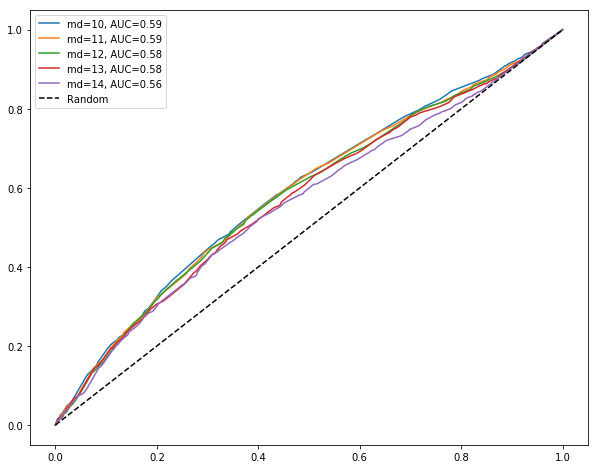

In [2]:
# Import pandas to read in data
import pandas as pd
import numpy as np

# Import matplotlib for plotting
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8


# Import decision trees and logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Import train, test, and evaluation functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# Read in our csv data
data = pd.read_csv("data/mailing.csv")

# Put all features into X and the target variable into Y
X = data.drop(['class'], axis=1)
Y = data['class']

# Split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

for max_depth in range(10,15):
    # Create an empty tree with the max depth I'm currently using
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)

    # Fit my tree on training data
    tree.fit(X_train, Y_train)

    # Get probabilities for my tree on the test data
    # MY NOTE HERE: [:,1]: retrive the second column (probability of Y class)
    Y_test_probabilities = tree.predict_proba(X_test)[:, 1]

    # Get TPR and FPR from my tree
    fpr, tpr, thresholds = roc_curve(Y_test, Y_test_probabilities)

    # Get area under the ROC curve
    auc = roc_auc_score(Y_test, Y_test_probabilities)
    
    # I'm going to round the AUC to 2 decimal places
    auc = round(auc, 2)
    
    # Plot my ROC curve and label it with my depth and AUROC
    plt.plot(fpr, tpr, label="md=" + str(max_depth) + ", AUC=" + str(auc))

# Add the random line and legend
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)

# Show the plot
plt.show()

Using the same data now try to generate a plot with at least two ROC curves on it. One should be from a decision tree and one from a logistic regression. You can choose any complexity or complexities that you want.

Which model would you probably choose? Is it hard to tell which is better from the curves?

### Part 1: all auto generated. No parameter tuning.

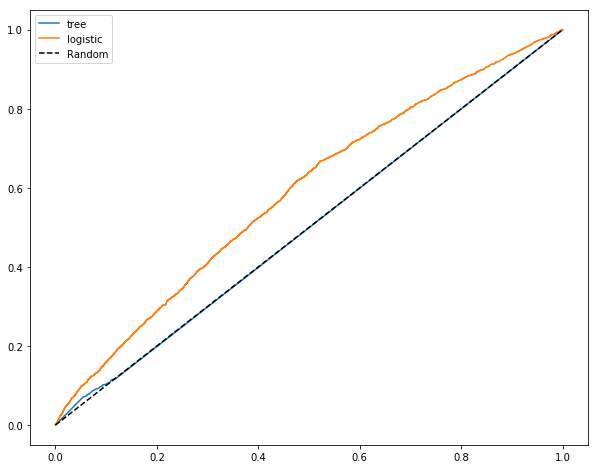

In [9]:
# Read in our csv data
data = pd.read_csv("data/mailing.csv")

# Put all features into X and the target variable into Y
X = data.drop(['class'], axis=1)
Y = data['class']

# Split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Create empty models (at least two!)
# tree = DecisionTreeClassifier(criterion="entropy", max_depth=...)
# logistic = LogisticRegression(C=...)

# here without tuning
tree = DecisionTreeClassifier(criterion="entropy")
logistic = LogisticRegression()

# Train models on training data
tree.fit(X_train,Y_train)
logistic.fit(X_train,Y_train)

# Get probabilities for my models on test data
Y_test_probabilities_tree = tree.predict_proba(X_test)[:, 1]
Y_test_probabilities_logistic = logistic.predict_proba(X_test)[:, 1]

# Get TPR and FPR from my models
fpr_tree, tpr_tree, thresholds_tree = roc_curve(Y_test, Y_test_probabilities_tree)
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(Y_test, Y_test_probabilities_logistic)

# Plot ROC curves
# Can you try to add the AUC to the label?
plt.plot(fpr_tree, tpr_tree, label="tree")
plt.plot(fpr_logistic, tpr_logistic, label="logistic")

# Add the random line and legend
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)

# Show the plot
plt.show()

### Part 2: Manual tuned parameters.

In [14]:
10**-1

0.1

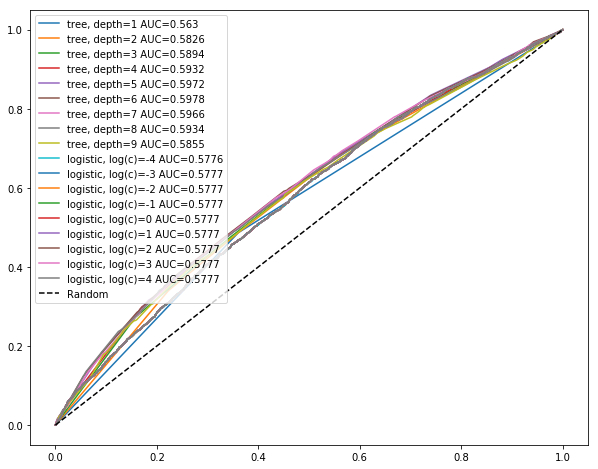

In [17]:
# Read in our csv data
data = pd.read_csv("data/mailing.csv")

# Put all features into X and the target variable into Y
X = data.drop(['class'], axis=1)
Y = data['class']

# Split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Create empty models (at least two!)
# Here we try different ranges

tree_depths = range(1,10,1)
C_range = range(-4,5,1)

for tree_depth in tree_depths:
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=tree_depth)
    tree.fit(X_train,Y_train)
    Y_test_probabilities_tree = tree.predict_proba(X_test)[:, 1]
    fpr_tree, tpr_tree, thresholds_tree = roc_curve(Y_test, Y_test_probabilities_tree)
    auc = round(roc_auc_score(Y_test,Y_test_probabilities_tree),4)
    label_text = "tree, depth=" + str(tree_depth) + " AUC=" + str(auc)
    plt.plot(fpr_tree, tpr_tree, label=label_text)

for c_value in C_range:
    c_value_real = 10**c_value
    logistic = LogisticRegression(C=c_value_real)
    logistic.fit(X_train,Y_train)
    Y_test_probabilities_logistic = logistic.predict_proba(X_test)[:, 1]
    fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(Y_test, Y_test_probabilities_logistic)
    auc = round(roc_auc_score(Y_test,Y_test_probabilities_logistic),4)
    label_text = "logistic, log(c)=" + str(c_value) + " AUC=" + str(auc)
    plt.plot(fpr_logistic, tpr_logistic, label=label_text)

# Add the random line and legend
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)

# Show the plot
plt.show()

***

### Part 2

Now build two ROC curves using the `data/cell2cell.csv` data (this is the customer churn data set from 3 weeks ago and that is discussed in the textbook).

The problem is to determine a model to predict whether customers will leave a mobile phone company for another one (called customer churn - see Lecture 1 and 2 for further discussions).

These historical data consist of 31,892 customers: 15,855 customers that churned (i.e., left the company) and 16,036 that did not churn. Here are the data set's 12 columns:

```
Col.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
12    churndep   Did the customer churn (1=Yes; 0=No)
```

The first 11 columns are our attributes/features. The last column, `"churndep"`, is the target variable.

1\. For this excercise you should:
- Randomly assign 75% of your data into training and the remaining 25% into test.
- Train a logistic regression model and use the test data to get the data to create an ROC curve.
- Train a decision tree model (try `criterion="entropy"`) and use the test data to get the data to create an ROC curve.
- Plot both ROC curves on one plot (don't forget a legend so I can tell which curve is which)
- Generate some statistics on your model: recall, precision, f-measure (see sklearn.metrics)
- Implement cross validation - see the previous practical and the following example from the documentation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py)

In [ ]:
# Import pandas to read in data
# Import matplotlib for plotting
# Import decision trees and logistic regression
# Import train, test, and evaluation functions


# Read in our csv data

# Put all features into X and the target variable into Y

# Split the data into 75% training and 25% testing 
# (for the last question add cross validation)

# Create both models
tree = ...
logistic = ...

# Fit both models
tree. ...
logistic. ...

# Get probabilities for each model on the test data
Y_test_probabilities_tree = tree.predict_proba(...)[:, 1]
Y_test_probabilities_logistic = logistic.predict_proba(...)[:, 1]

# Get TPR - true positive rate - and FPR - false positive rate - for each model
fpr_tree, tpr_tree, thresholds_tree = roc_curve(...)
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(...)
    
# Plot two ROC curves on one plot. Don't forget labels and your legend
plt.plot(...)
plt.plot(...)

plt.show()

2\. Discuss your observations of the ROC curves above with other class members and the tutor. Are they similar? How well are they doing? Do you like one more than the other?

Answer here!

3\. These models are using default complexity parameters (the decision tree can be very large and the logistic regression has no regularization). 

Do you think looking at just these two ROC curves is enough to pick the *best* model? What else might you want to explore to choose the best possible model? Think about how you might implement this in Python with an extended cross validation scheme as discussed in the last lecture.

Answer here!